# sklearn中的决策树
## 目录
* 使用sklearn构建一颗分类树
* 分类树的属性
* 分类树的调参
* 分类树的接口

* 使用sklearn构建一颗回归树

sklearn中的决策树得类都在sklearn.tree这个模块下
这个模块总共包含5个类

|  -|  |
|:--|:--|
|DecisionTreeClassifier|分类树|
|DecisionTreeRegressor|回归树|
|export_graphviz|将生成的树导出为DOT格式，画图专用
|ExtraTreeClasifier|高随机版本分类树
|ExtraTreeRegressor|高随机版本回归树

## 使用sklearn构建一棵分类树

In [42]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine()
wine.data.shape

(178, 13)

In [43]:
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [44]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [45]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [46]:
X_train,X_test,y_train,y_test = train_test_split(wine.data,wine.target,test_size=0.3)

In [47]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9444444444444444

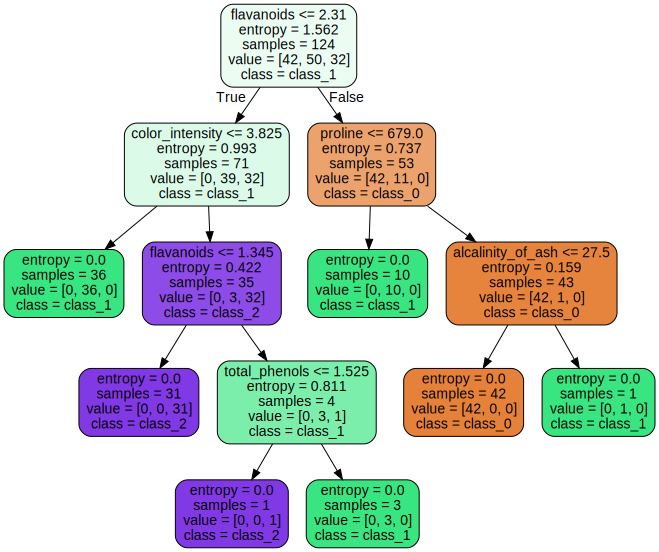

In [48]:
import graphviz
dot_data = tree.export_graphviz(clf,
                                feature_names=wine.feature_names,
                                class_names = wine.target_names,
                                filled=True,
                                rounded=True,
                               )
graph = graphviz.Source(dot_data)
graph
# graph.render("hi")#进行生成的树的保存

## 分类树的属性
|-| |
|:--|:--|
|classes_|标签的类别|
|feature_importances_|返回每个特征的重要性。一般这个特征是在多次分枝中产生信息增益的综合，也被称为“基尼重要性”
|max_features|参数max_features的推断值|
|n_classes_|标签类别的种类
|n_features|在fit时使用的特征个数
|n_outputs_|在fit时输出的结果个数
|tree_|输出一个建好的树结构的端口

In [49]:
[*zip(wine.feature_names,clf.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.03538365904872332),
 ('magnesium', 0.0),
 ('total_phenols', 0.016757599408700523),
 ('flavanoids', 0.49380296401812107),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.28779387008483504),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.1662619074396202)]

## 决策树的调参
### DecisionTreeClassifier中的参数
|参数列表|   |
|:--|:--|
|criterion|默认"gini"<br>用来衡量不纯度的指标<br>"gini"使用基尼系数<br>"entropy"使用信息熵
|splitter|默认"best"<br>确定给每个节点的分支策略<br>"best"使用最佳分枝<br>"random"使用最佳随机分支
|max_depth|默认"None"<br>树的最大深度<br>None,树会持续生长直到所有叶子节点的不纯度为0，或者直到每个叶子节点所含的样本量都小于参数min_samples_split中输入的数字<br>建议从3开始尝试
|min_samples_split|默认为2<br>一个中间节点要分枝所需要的最小样本量。如果一个节点包含的样本量小于min_samples_split中的数字，则分枝不会发生（此节点会成为叶子结点）<br>输入整数，则为分枝所需的最小样本量<br>输入浮点数，则认为输入的浮点数为比例。浮点数*模型的数据集为分枝所需的最小样本量
|min_sample_leaf|默认为1<br>一个叶子结点存在所需要的最小样本数。一个节点在分枝后的每个子节点中，必须要包含至少min_sample_leaf个训练样本，否则分枝就不会发生。<br>这个参数会使得模型有更平滑的效果，尤其是在回归中<br>输入整数，则数字为也节点存在所需的最小样本量<br>输入浮点数，则浮点数*输入模型的数据集 是叶节点存在所需的最小样本量
|max_features|默认为None<br>在做最佳分枝的时候，考虑的特征的个数<br>整数，则每次分枝都考虑max_features个特征<br>浮点数，每次考虑n_features对应比例的特征个数<br>"auto",max_features = sqrt(n_features)<br>"sqrt",max_features= sqrt(n_features)<br>"log2",max_features = log2(n_features)<br>None,max_features = n_features
|random_state|随机数<br>默认为None
|max_leaf_nodes|默认为None<br>最大的叶子结点个数
|min_impurity_decrease|默认为0<br>当不纯度的降低大于或等于min_impurity_decrease时，这个分枝会被保留。
|class_weight|默认为None<br>与标签相关联的权重<br>"None",权重相同<br>"balanced",权重为频率的倒数<br>dict，example{0:1,1:2}<br>list of dicts,多分类问题时使用,注意在填写时，每个标签为二分类。例如一个四分类问题，权重应该为[{0:1,1:1},{0:1,1:5},{0:1,1:1},{0:1,1:1}]
|presort|默认为False<br>是否预先分配数据，以加快拟合中最佳分枝。<br>在大型数据集上使用默认设置决策树时，将这个参数设置为true可能会延长训练过程，降低训练速度。当使用较小数据集或限制树的深度时，设置这个参数可能会加快训练速度。

更多内容，详见sklearn文档
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [50]:
clf = tree.DecisionTreeClassifier(
    criterion = "entropy",
    random_state = 30,#用来设置分枝中的随机模式的参数
    splitter="random"#决策树在分枝时，更加随机
                                 )
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

1.0

In [51]:
clf.score(X_train,y_train)

1.0

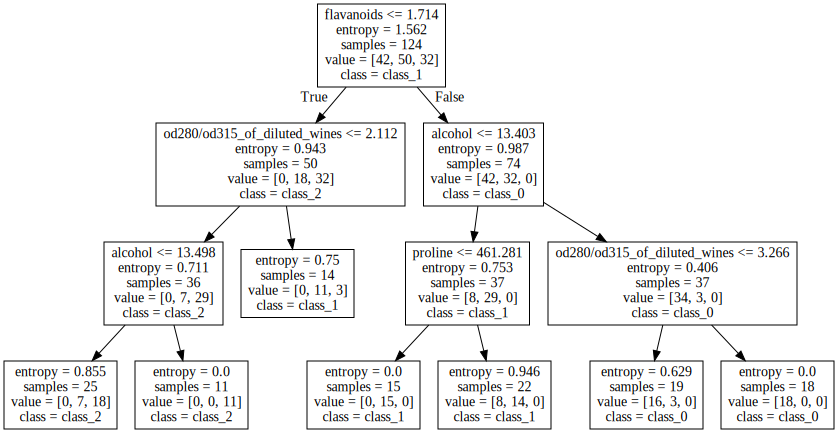

In [52]:
clf = tree.DecisionTreeClassifier(
    criterion = "entropy",
    random_state = 30,#用来设置分枝中的随机模式的参数
    splitter="random",#决策树在分枝时，更加随机，
    max_depth=3,
    min_samples_leaf=10,
    min_samples_split=10,
                                 )
clf.fit(X_train,y_train)

dot_data = tree.export_graphviz(
    clf,
    feature_names=wine.feature_names,
    class_names=wine.target_names
                               )
g = graphviz.Source(dot_data)
g

In [53]:
clf.score(X_train,y_train)

0.8306451612903226

In [54]:
clf.score(X_test,y_test)

0.8703703703703703

### 确定最优的剪枝参数

#### 方法一：绘制超参数学习曲线

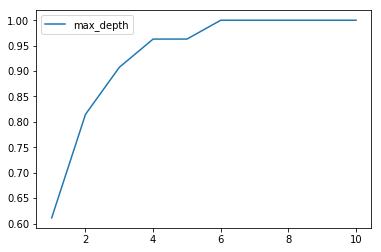

In [55]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1,
                                     criterion="entropy",
                                     random_state=30,
                                     splitter='random')
    clf.fit(X_train,y_train)
    test.append(clf.score(X_test,y_test))
    
plt.plot(range(1,11),test,label='max_depth')
plt.legend()
plt.show()

#### 方法二：GridSearchCV

In [56]:
param = {
    "max_depth":[*range(1,10)],
     "min_samples_leaf":[*range(1,20,5)],
     "criterion":("gini","entropy"),
     "splitter":("best","random"),
     "min_impurity_decrease":[*np.linspace(0,0.5,20)]
    }

clf = tree.DecisionTreeClassifier(random_state=25)

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    clf,
    param,
    cv=10,
    n_jobs=-1,
    verbose=5
)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 2880 candidates, totalling 28800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2464 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 9484 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 19312 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 28800 out of 28800 | elapsed:    9.7s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 6, 11, 16], 'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random'), 'min_impurity_decrease': [0.0, 0.02631578947368421, 0.05263157894736842, 0.07894736842105263, 0.10526315789473684, 0.13157894736842105, 0.157894...0526315789, 0.39473684210526316, 0.42105263157894735, 0.4473684210526315, 0.47368421052631576, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [58]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [59]:
grid_search.best_score_

0.9435483870967742

In [60]:
clf = grid_search.best_estimator_
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9074074074074074

## 决策树的接口
|-| |
|:--|:--|
|apply|返回每个测试样本所在的叶子节点的索引|
|predict|返回预测结果|

In [15]:
clf.apply(X_test)

array([14, 11,  9, 28, 11, 11, 11, 11, 14,  9, 28, 28, 10, 14, 28, 14, 28,
       28, 28, 11, 14, 11, 28, 11,  9, 25, 28, 11, 12, 17, 20,  9, 28,  9,
       14, 11, 28, 28, 14, 14, 28, 11, 20, 20, 28, 28, 11, 28, 20, 23, 14,
       28, 28, 28])

## 使用sklearn构建一颗回归树

In [16]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

boston = load_boston()
regressor = DecisionTreeRegressor(criterion="mse",random_state=0)
cross_val_score(regressor,boston.data,boston.target,cv=10,
               scoring = 'neg_mean_squared_error')

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -44.70117647, -12.2148    , -91.3888    ,
       -57.764     , -36.8134    ])

回归树中的评价指标

|crition|默认为"mse"|
|:--|:--|
|"mse"|均方误差|
|"friedman_mse"|费尔德曼均方误差|
|"mae"|绝对平均误差|

## 实例：拟合正弦曲线

In [36]:
np.random.seed(1)
X = np.sort(5 * np.random.random((80,1),),axis=0)
y = np.sin(X).flatten()
y[::5] += 3*(0.5-np.random.random(16))

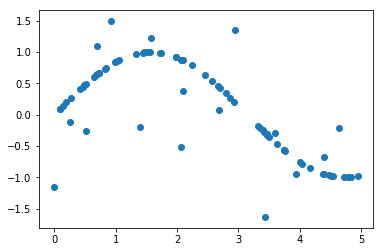

In [37]:
plt.scatter(X,y)

In [38]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X,y)
regr_2.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

<function matplotlib.pyplot.show(*args, **kw)>

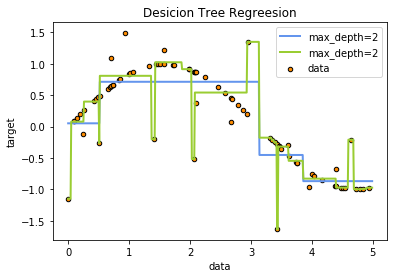

In [39]:
X_test = np.arange(0,5,0.01).reshape(-1,1)
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

plt.figure()
plt.scatter(X,y,s=20,edgecolor='black',c='darkorange',label='data')
plt.plot(X_test,y_1,color = 'cornflowerblue',label='max_depth=2',linewidth=2)
plt.plot(X_test,y_2,color = 'yellowgreen',label='max_depth=2',linewidth=2)
plt.xlabel('data')
plt.ylabel("target")
plt.title('Desicion Tree Regreesion')
plt.legend()
plt.show

总结：  
对于回归树而言，如果树的最大深度设置的太高，决策树学习得太精细，容易过拟合